In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #For data visualization
import numpy as np #For data processing on series
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/capstone-car-accident-serveity/Data_Collisions.csv


In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Introduction

In this capstone project we are given data of car accidents and have to predict the severity of accident. 
There are total 38 columns, 1 of which is the severity itself.
First let us import the data and explore some of its basic features such as data-types of columns, Missing values ..etc.

In [3]:
df = pd.read_csv("../input/capstone-car-accident-serveity/Data_Collisions.csv")
df.info() #Analysing data types of each column

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [4]:
df.nunique() #Analysing number of unique values per column

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

In [5]:
df.isna().sum() #Finding total number of missing values in the data.

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

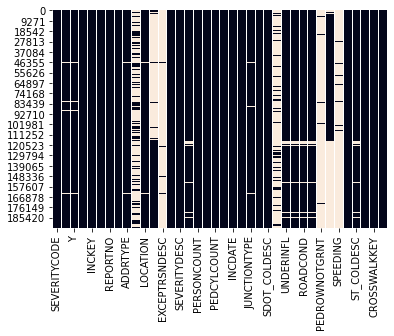

In [6]:
sns.heatmap(df.isnull(), cbar=False) #Visualizing the missing values

The following data columns have missing values more than 50% of the total entries.
1. **EXCEPTRSNDESC**
2. **SPEEDING**
3. **PEDROWNOTGRNT**
4. **INATTENTIONIND**

We can use the NaN values as a separate "unkown" variable and move forward.


In [7]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


# Data Visualization

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


# Converting Categorical variables to Dummy

From the above correlation matrix we find out that datafields "SDOTCOLNUM", "INCKEY", "COLDETKEY" & "OBJECTID" are highly correlated. Hence we can drop 3 columns from them. As "OBJECTID" does not have any NaN values hence we can use that . Also there are two identical columns "SEVERITYCODE.1" and "SEVERITYCODE" hence we can drop 1 of them as well.

In [9]:
df["ST_COLCODE"] = df["ST_COLCODE"].fillna(df["ST_COLCODE"].mode()[0])
df["UNDERINFL"] = df["UNDERINFL"].fillna(df["UNDERINFL"].mode()[0])
df["X"] = df["X"].fillna(df["X"].median())
df["Y"] = df["Y"].fillna(df["Y"].median())
df["LIGHTCOND"] = df["LIGHTCOND"].fillna(df["LIGHTCOND"].mode()[0])
df = df.drop(["SDOTCOLNUM","INTKEY","COLDETKEY","SEVERITYCODE.1","SPEEDING" ,"EXCEPTRSNDESC","PEDROWNOTGRNT","INATTENTIONIND","EXCEPTRSNCODE","LOCATION","INCDATE","INCDTTM","OBJECTID","REPORTNO","SDOT_COLDESC","ST_COLDESC","ST_COLCODE","SEVERITYDESC"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   194673 non-null  int64  
 1   X              194673 non-null  float64
 2   Y              194673 non-null  float64
 3   INCKEY         194673 non-null  int64  
 4   STATUS         194673 non-null  object 
 5   ADDRTYPE       192747 non-null  object 
 6   COLLISIONTYPE  189769 non-null  object 
 7   PERSONCOUNT    194673 non-null  int64  
 8   PEDCOUNT       194673 non-null  int64  
 9   PEDCYLCOUNT    194673 non-null  int64  
 10  VEHCOUNT       194673 non-null  int64  
 11  JUNCTIONTYPE   188344 non-null  object 
 12  SDOT_COLCODE   194673 non-null  int64  
 13  UNDERINFL      194673 non-null  object 
 14  WEATHER        189592 non-null  object 
 15  ROADCOND       189661 non-null  object 
 16  LIGHTCOND      194673 non-null  object 
 17  SEGLANEKEY     194673 non-nul

In [10]:
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
INCKEY             int64
STATUS            object
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
dtype: object

In [11]:

#Making a list of all categorical variables
clmn = {"STATUS","ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","HITPARKEDCAR"}

#Converting them into dummy variables
df = pd.get_dummies(data=df,columns=clmn,prefix=clmn)

#Concatnating them to the dataframe
df.dtypes

SEVERITYCODE            int64
X                     float64
Y                     float64
INCKEY                  int64
PERSONCOUNT             int64
                       ...   
LIGHTCOND_Dawn          uint8
LIGHTCOND_Daylight      uint8
LIGHTCOND_Dusk          uint8
LIGHTCOND_Other         uint8
LIGHTCOND_Unknown       uint8
Length: 68, dtype: object

In [12]:
df.shape

(194673, 68)

# Splitting data into two dataframes. 

In [13]:
X = df.drop(["SEVERITYCODE"],axis=1)
y = df["SEVERITYCODE"]


# Using Logistic Regression Model

0.7251573134711699
              precision    recall  f1-score   support

           1       0.72      0.99      0.84     27322
           2       0.88      0.09      0.16     11613

    accuracy                           0.73     38935
   macro avg       0.80      0.54      0.50     38935
weighted avg       0.77      0.73      0.64     38935



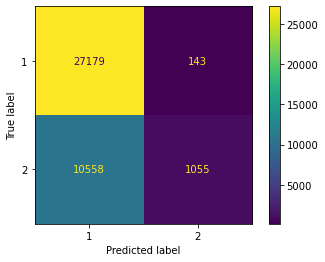

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


LR = LogisticRegression(max_iter=100000)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

LR.fit(X_train,y_train)
score = LR.score(X_test, y_test)
print(score)

#y_pred = LR.predict(X_test)


plot_confusion_matrix(LR,X_test,y_test)

y_pred = LR.predict(X_test) 
print(classification_report(y_test, y_pred))


# Using Decision Tree Classifier

0.6885064851675871
              precision    recall  f1-score   support

           1       0.78      0.77      0.78     27322
           2       0.48      0.50      0.49     11613

    accuracy                           0.69     38935
   macro avg       0.63      0.63      0.63     38935
weighted avg       0.69      0.69      0.69     38935



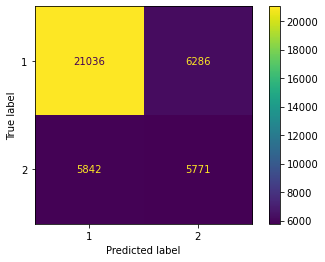

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import  cross_val_score

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)
score_1 = DT.score(X_test, y_test)
print(score_1)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DT,X_test,y_test)

y_pred_1 = DT.predict(X_test) 
#y_pred.reshape(-1,1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))


# Using Random Forest Classifier

0.7506613586747143
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27322
           2       0.89      0.19      0.31     11613

    accuracy                           0.75     38935
   macro avg       0.82      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



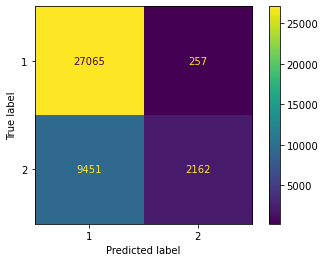

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

random_forest.fit(X_train,y_train)
score_2 = random_forest.score(X_test, y_test)
print(score_2)

plot_confusion_matrix(random_forest,X_test,y_test)


y_pred_2 = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred_2))




In [17]:
from sklearn.model_selection import  cross_val_score
c_dec = cross_val_score(random_forest, X_train, y_train, cv=10)
print(c_dec.mean())

0.7471715644932806


0.7506613586747143
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27322
           2       0.89      0.19      0.31     11613

    accuracy                           0.75     38935
   macro avg       0.82      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



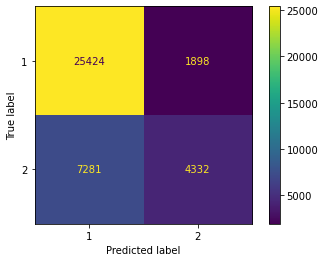

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)
score_3 = random_forest.score(X_test, y_test)
print(score_3)

plot_confusion_matrix(xgb,X_test,y_test)


y_pred_3 = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred_3))